### Project
lending_club_data_2012_2014
- Author: Shelar Rohit
- Dtae: 14/03/2021

In [83]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [84]:
import pandas as pd
df = pd.read_csv("lending_club_data_2012_2014.csv")
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
0,36805548,NaN,10400,10400,10400.0,36 months,6.99,321.08,A,A3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2014
1,38098114,NaN,15000,15000,15000.0,60 months,12.39,336.64,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2014
2,37822187,NaN,9600,9600,9600.0,36 months,13.66,326.53,C,C3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2014


In [275]:
len(df)

83366

In [85]:
len(df.columns)

152

In [86]:
# all columns
print(list(df.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [88]:
# checking on the loan_status column
pd.value_counts(df.loan_status).to_frame().reset_index()

,index,loan_status
0,Fully Paid,340444
1,Charged Off,70829
2,Current,11925
3,Late (31-120 days),337
4,In Grace Period,201
5,Late (16-30 days),73
6,Default,1


In [89]:
# Removing fully paid as they are historic and don't add relevant information in prediction of good or bad loans
df = df[df.loan_status != 'Fully Paid']

In [90]:
pd.value_counts(df.loan_status).to_frame().reset_index()

,index,loan_status
0,Charged Off,70829
1,Current,11925
2,Late (31-120 days),337
3,In Grace Period,201
4,Late (16-30 days),73
5,Default,1


In [91]:
# let's create a column of Good loan - 0 Bad loan - 1 as target variable

In [92]:
# As we can understand from the data;
# current loans will be considered as Good loans whereas all others will be considered as Bad loans 

In [93]:
df['Target'] = np.where((df.loan_status != 'Current'), 1, 0)

In [94]:
df.Target.value_counts()

1    71441
0    11925
Name: Target, dtype: int64

In [95]:
df = df.drop(columns=['id', 'member_id','emp_title', 'url', 'desc', 'title', 'zip_code'])

In [96]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

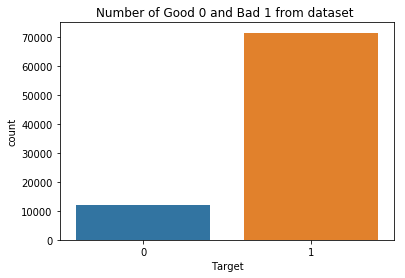

In [97]:
sns.countplot(x='Target', data = df)
plt.title('Number of Good 0 and Bad 1 from dataset ')
plt.show()

In [98]:
cat_cols = df.select_dtypes(include=object).columns.tolist()

In [ ]:
# Count distribution of categorical variables

term


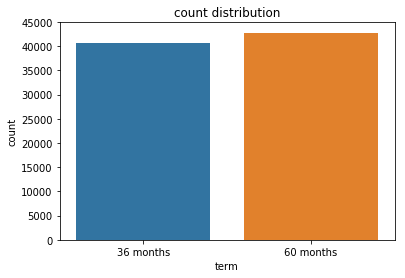

grade


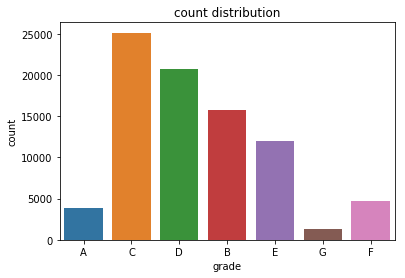

sub_grade


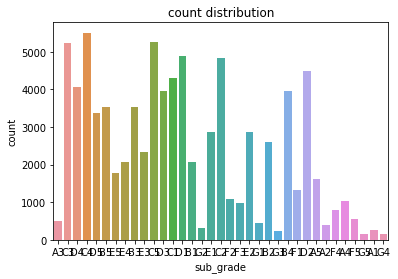

emp_length


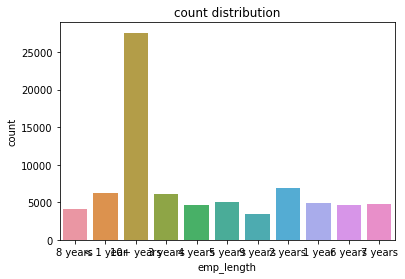

home_ownership


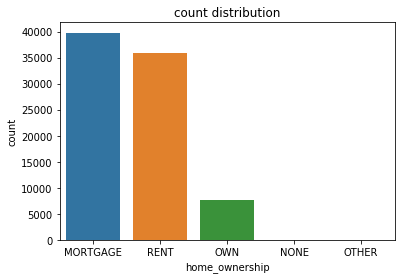

verification_status


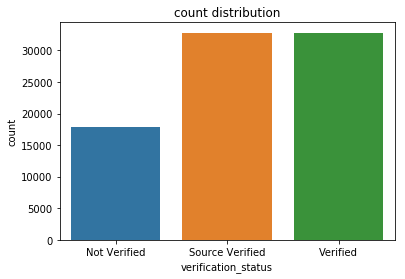

issue_d


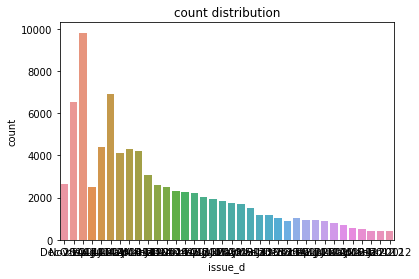

loan_status


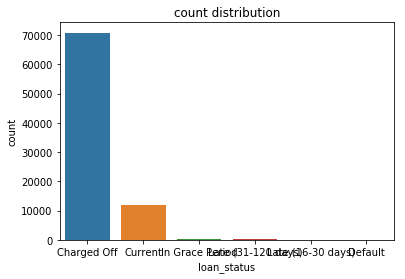

pymnt_plan


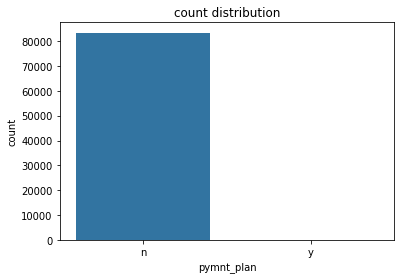

purpose


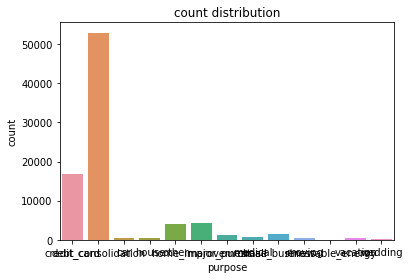

addr_state


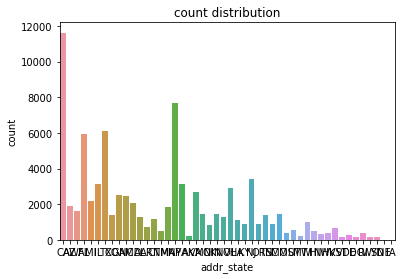

earliest_cr_line


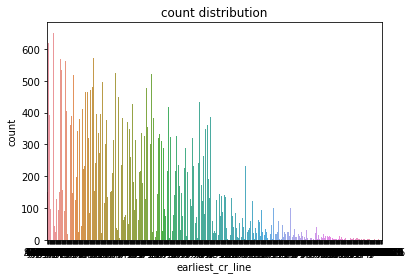

initial_list_status


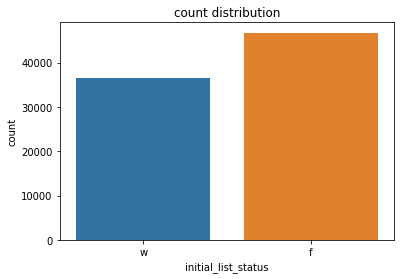

last_pymnt_d


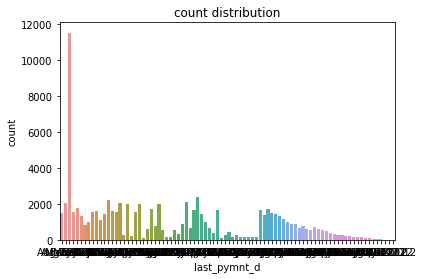

next_pymnt_d


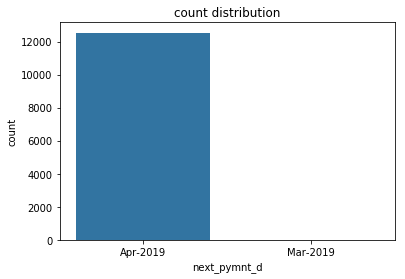

last_credit_pull_d


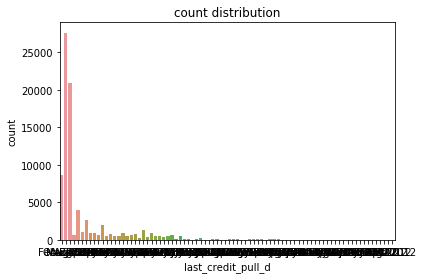

application_type


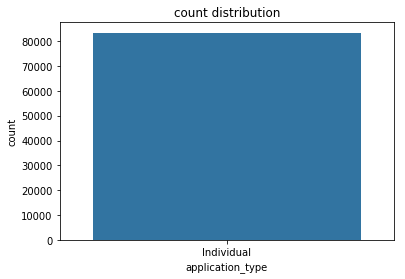

hardship_flag


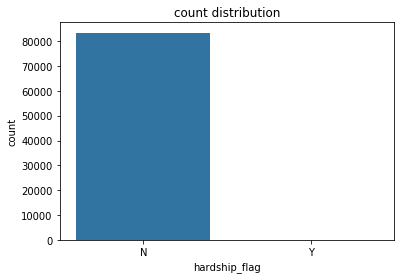

hardship_type


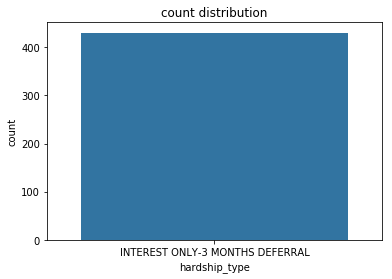

hardship_reason


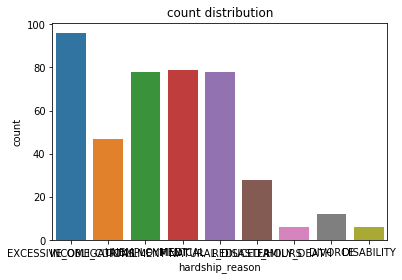

hardship_status


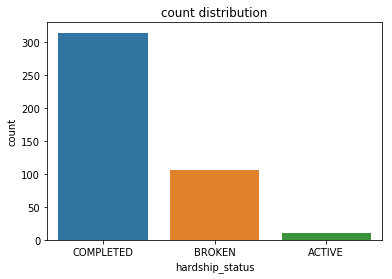

hardship_start_date


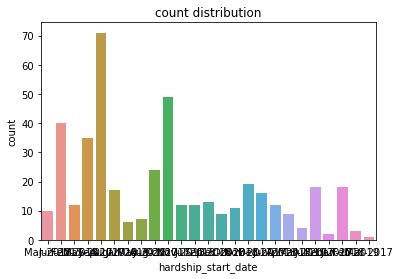

hardship_end_date


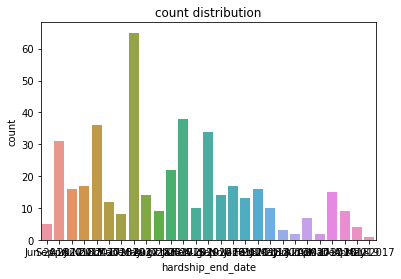

payment_plan_start_date


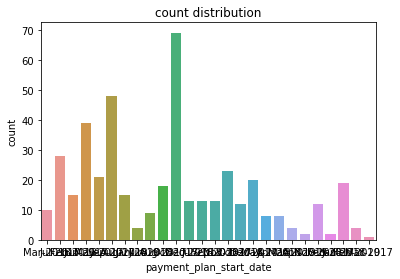

hardship_loan_status


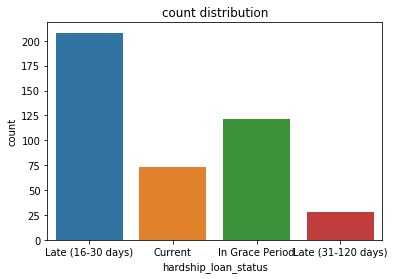

disbursement_method


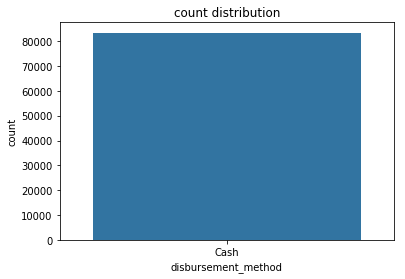

debt_settlement_flag


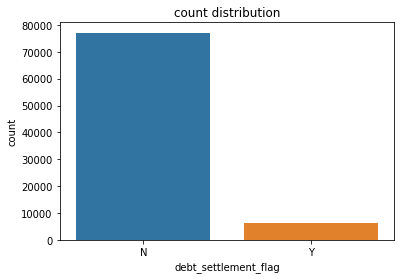

debt_settlement_flag_date


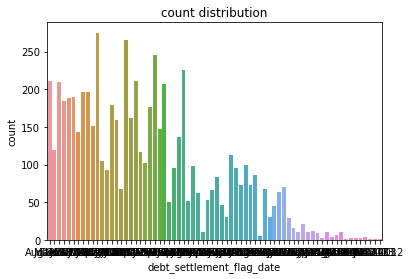

settlement_status


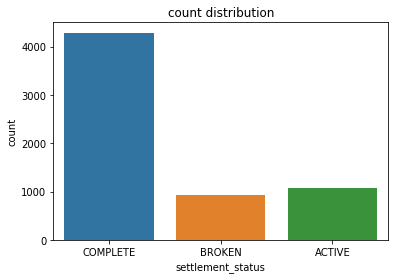

settlement_date


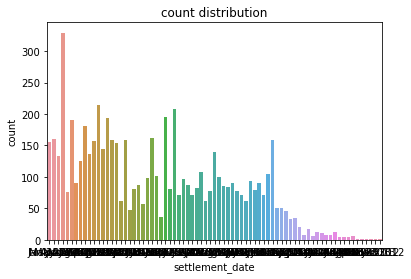

In [99]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
for col in cat_cols:
    print(col)
    sns.countplot(x=col, data = df)
    plt.title('count distribution')
    plt.show()

In [ ]:
# Looking at all the graphs, we can clearly see that pymnt_plan, next_pymnt_d, application_type, hardship_flag, hardship_type, disbursement_method are coulmns with only one type of variable, so it does not add a say into prediction.
# We can eliminate the said columns.

In [100]:
df = df.drop(columns=['pymnt_plan', 'next_pymnt_d', 'application_type', 'hardship_flag', 'hardship_type', 'disbursement_method'])

In [101]:
len(df.columns)

140

In [ ]:
# We can also drop the column loan_status as Target variable is directy derived from loan_status

In [102]:
df = df.drop(columns='loan_status')

In [ ]:
# Let's try other feature selection techniques to get more relevant features out of remaining 140 features

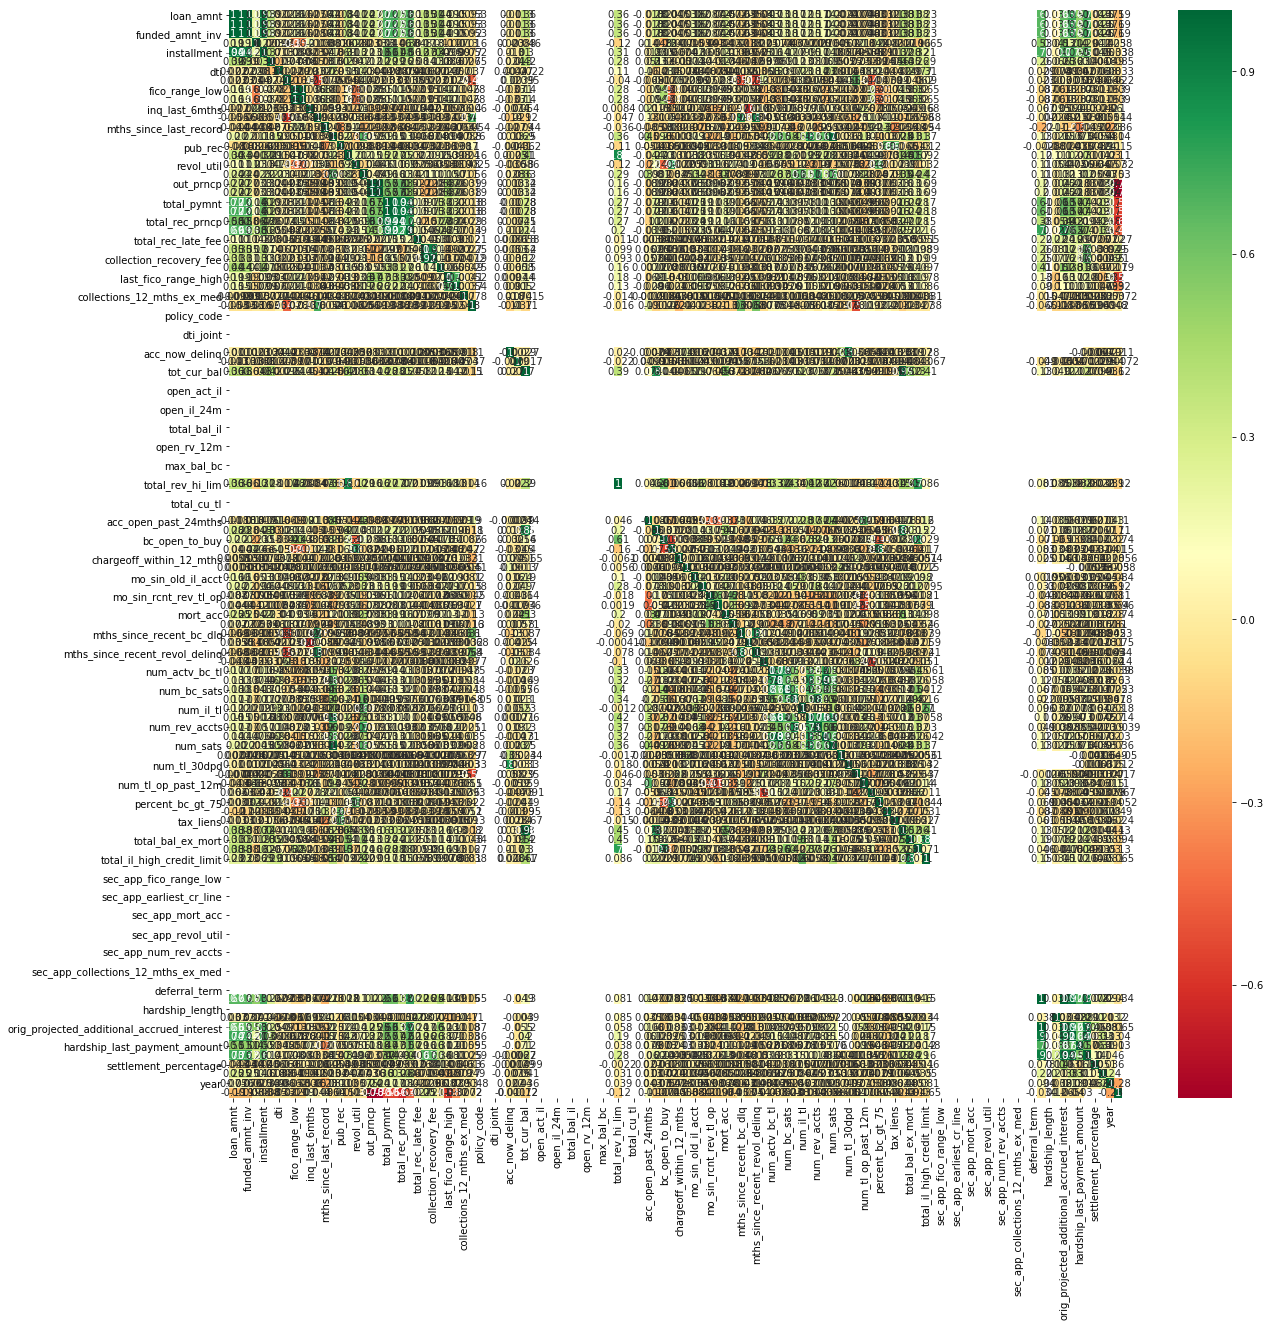

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# visualization of correlation graph is not helpful.
# Let's drop all highyly correlated columns with code below

In [104]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [105]:
to_drop

['funded_amnt',
 'funded_amnt_inv',
 'fico_range_high',
 'out_prncp_inv',
 'total_pymnt_inv',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'tot_hi_cred_lim',
 'orig_projected_additional_accrued_interest']

In [106]:
df.drop(to_drop, axis=1, inplace=True)

In [107]:
len(df.columns)

130

In [108]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,Target
0,10400,36 months,6.99,321.08,A,A3,8 years,MORTGAGE,58000.0,Not Verified,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
3,7650,36 months,13.66,260.20,C,C3,< 1 year,RENT,50000.0,Source Verified,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
4,12800,60 months,17.14,319.08,D,D4,10+ years,MORTGAGE,125000.0,Verified,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2014,0
7,23325,36 months,14.31,800.71,C,C4,10+ years,RENT,72000.0,Source Verified,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
9,12975,36 months,17.86,468.17,D,D5,10+ years,RENT,60000.0,Source Verified,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2014,1


In [113]:
df.isna().sum()

loan_amnt                                  0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
sub_grade                                  0
emp_length                              4769
home_ownership                             0
annual_inc                                 0
verification_status                        0
issue_d                                    0
purpose                                    0
addr_state                                 0
dti                                        0
delinq_2yrs                                0
earliest_cr_line                           0
fico_range_low                             0
inq_last_6mths                             0
mths_since_last_delinq                 42891
mths_since_last_record                 71186
open_acc                                   0
pub_rec                                    0
revol_bal 

In [123]:
# columns with more than 40% null values are droped
df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [124]:
len(df.columns)

77

In [125]:
df.isna().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    4769
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
fico_range_low                   0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      55
total_acc                        0
initial_list_status              0
out_prncp                        0
total_pymnt                      0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee  

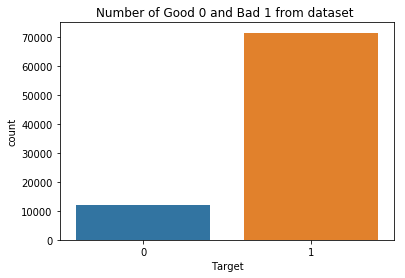

In [126]:
sns.countplot(x='Target', data = df)
plt.title('Number of Good 0 and Bad 1 from dataset ')
plt.show()

In [127]:
len(df)

83366

In [128]:
df.Target.value_counts()

1    71441
0    11925
Name: Target, dtype: int64

In [157]:
# list all the categoricl columns
List = []
for col in df.columns:
    if df[col].dtype.name == 'object':
        List.append(col)

In [158]:
print(List)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'debt_settlement_flag']


In [160]:
df_cat = df[['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'debt_settlement_flag']]

In [162]:
df_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,debt_settlement_flag
0,36 months,A,A3,8 years,MORTGAGE,Not Verified,Dec-2014,credit_card,CA,Sep-1989,w,Aug-2016,Feb-2017,N
3,36 months,C,C3,< 1 year,RENT,Source Verified,Dec-2014,debt_consolidation,AZ,Aug-2002,f,Aug-2015,Oct-2016,N
4,60 months,D,D4,10+ years,MORTGAGE,Verified,Dec-2014,car,CA,Oct-2000,w,Mar-2019,Mar-2019,N
7,36 months,C,C4,10+ years,RENT,Source Verified,Dec-2014,credit_card,WA,Oct-1998,f,Feb-2016,Oct-2016,N
9,36 months,D,D5,10+ years,RENT,Source Verified,Dec-2014,house,FL,Jan-1999,f,Mar-2016,Oct-2016,N


term


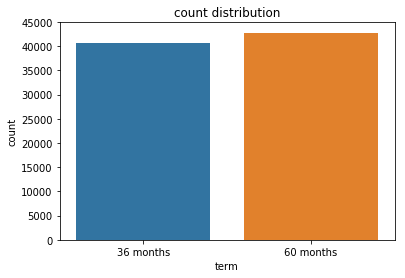

grade


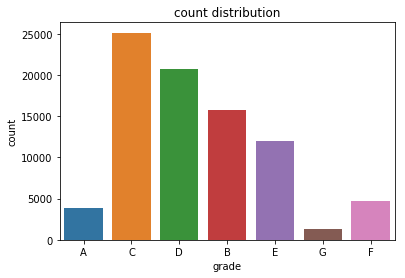

sub_grade


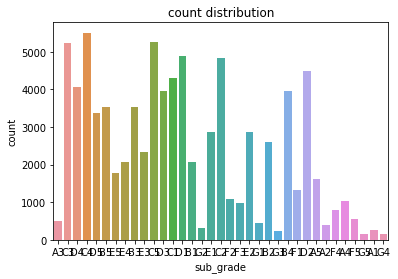

emp_length


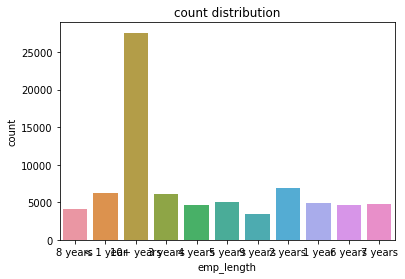

home_ownership


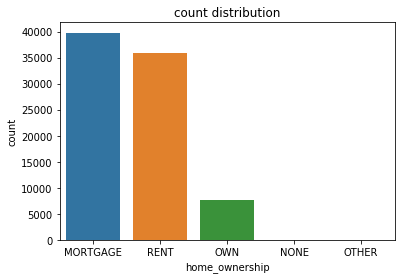

verification_status


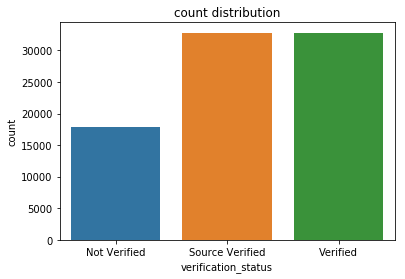

issue_d


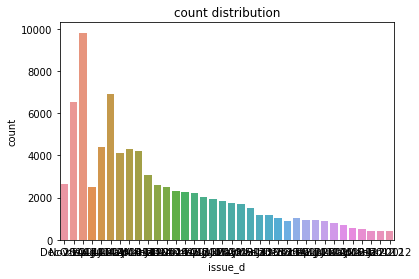

purpose


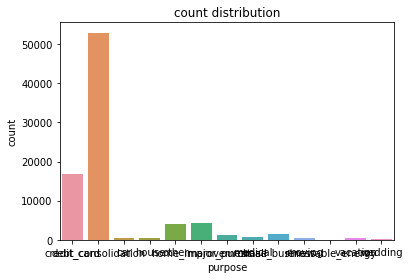

addr_state


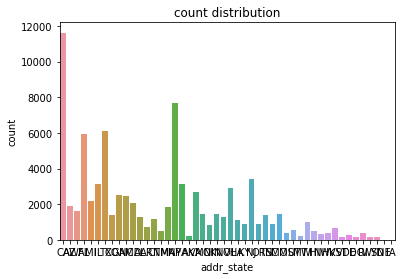

earliest_cr_line


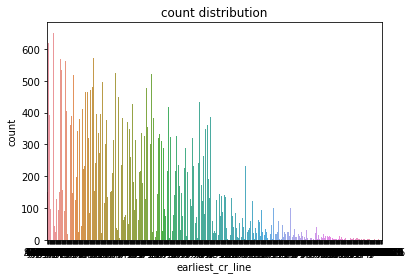

initial_list_status


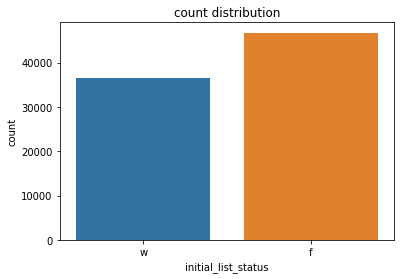

last_pymnt_d


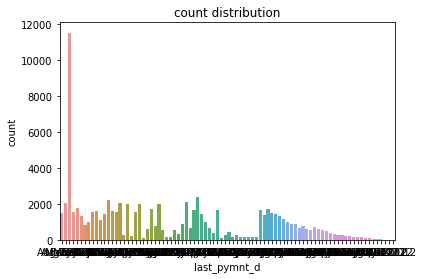

last_credit_pull_d


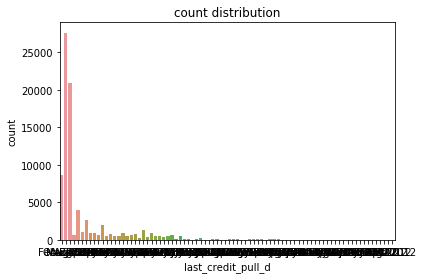

debt_settlement_flag


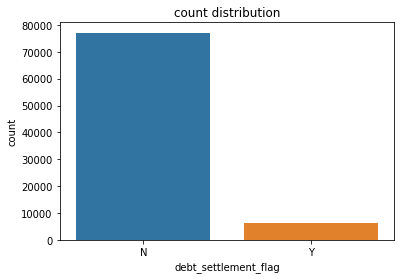

In [163]:
# check the distribution

cat_cols = df_cat.select_dtypes(include=object).columns.tolist()
for col in cat_cols:
    print(col)
    sns.countplot(x=col, data = df_cat)
    plt.title('count distribution')
    plt.show()

In [ ]:
# Let's lable encode all the categorical features

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [177]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,year,Target
0,10400,0,6.99,321.08,0,2,8,0,58000.0,0,...,83.3,14.3,0,0,15030.0,13000.0,11325.0,0,2014,1
3,7650,0,13.66,260.20,2,12,10,4,50000.0,1,...,100.0,100.0,0,0,64426.0,4900.0,64031.0,0,2014,1
4,12800,1,17.14,319.08,3,18,1,0,125000.0,2,...,76.9,100.0,0,0,18007.0,4400.0,18000.0,0,2014,0
7,23325,0,14.31,800.71,2,13,1,4,72000.0,1,...,95.7,66.7,0,0,79490.0,36000.0,78126.0,0,2014,1
9,12975,0,17.86,468.17,3,19,1,4,60000.0,1,...,89.5,0.0,0,0,17281.0,5500.0,27243.0,0,2014,1


In [ ]:
# Let's handle all remaining missing values
# as all are numeric features and missing values are less than 10%
# We can fill them with mean of the column 

In [178]:
df.isna().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
fico_range_low                   0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      55
total_acc                        0
initial_list_status              0
out_prncp                        0
total_pymnt                      0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee  

In [181]:
# fillinf nan with mean 
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [182]:
df.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
                             ..
delinq_a

In [183]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,year,Target
0,10400,0,6.99,321.08,0,2,8,0,58000.0,0,...,83.3,14.3,0,0,15030.0,13000.0,11325.0,0,2014,1
3,7650,0,13.66,260.20,2,12,10,4,50000.0,1,...,100.0,100.0,0,0,64426.0,4900.0,64031.0,0,2014,1
4,12800,1,17.14,319.08,3,18,1,0,125000.0,2,...,76.9,100.0,0,0,18007.0,4400.0,18000.0,0,2014,0
7,23325,0,14.31,800.71,2,13,1,4,72000.0,1,...,95.7,66.7,0,0,79490.0,36000.0,78126.0,0,2014,1
9,12975,0,17.86,468.17,3,19,1,4,60000.0,1,...,89.5,0.0,0,0,17281.0,5500.0,27243.0,0,2014,1


In [ ]:
# While feature selecion I came to know that there are negative values in some column
# Let's explore the nature of negative values

In [197]:
# column list with negative values in it 
print(df.columns[(df < 0).any()])

Index(['total_rec_late_fee'], dtype='object')


In [199]:
# All negative values in the column 
[val for val in df['total_rec_late_fee'] if val<0 ]

[-5e-10, -7.000000000000001e-10]

In [ ]:
# As there are only two negative values in entire dataframe which cause problem in SelectKBest 
# algo, so we will simply make them Zero for quick fix.

In [202]:
df.total_rec_late_fee[df.total_rec_late_fee < 0] = 0

In [239]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.drop(columns='Target') 
y = df['Target']

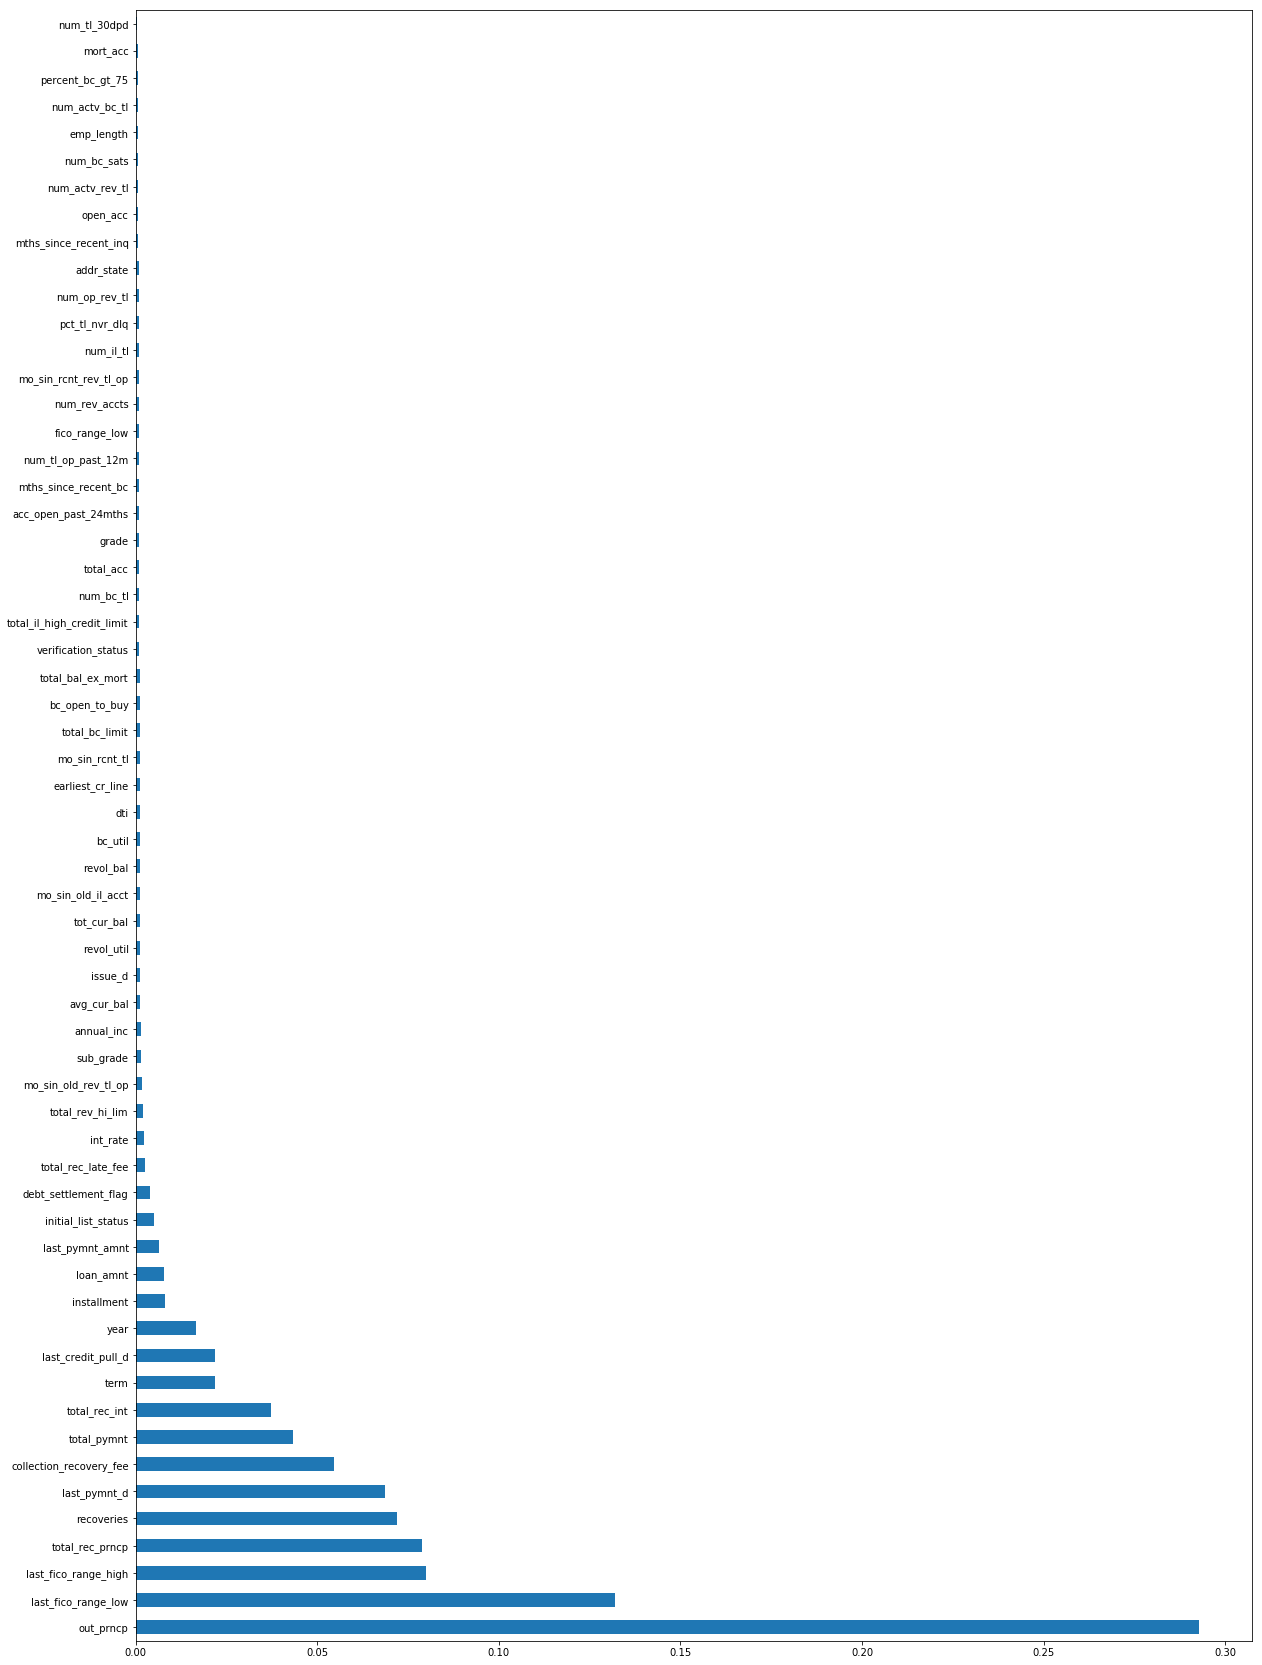

In [223]:
# feature_importances_

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(60).plot(kind='barh',figsize=(20,30))
plt.show()

In [234]:
feat_importances.nlargest(50).index

Index(['out_prncp', 'last_fico_range_low', 'last_fico_range_high',
       'total_rec_prncp', 'recoveries', 'last_pymnt_d',
       'collection_recovery_fee', 'total_pymnt', 'total_rec_int', 'term',
       'last_credit_pull_d', 'year', 'installment', 'loan_amnt',
       'last_pymnt_amnt', 'initial_list_status', 'debt_settlement_flag',
       'total_rec_late_fee', 'int_rate', 'total_rev_hi_lim',
       'mo_sin_old_rev_tl_op', 'sub_grade', 'annual_inc', 'avg_cur_bal',
       'issue_d', 'revol_util', 'tot_cur_bal', 'mo_sin_old_il_acct',
       'revol_bal', 'bc_util', 'dti', 'earliest_cr_line', 'mo_sin_rcnt_tl',
       'total_bc_limit', 'bc_open_to_buy', 'total_bal_ex_mort',
       'verification_status', 'total_il_high_credit_limit', 'num_bc_tl',
       'total_acc', 'grade', 'acc_open_past_24mths', 'mths_since_recent_bc',
       'num_tl_op_past_12m', 'fico_range_low', 'num_rev_accts',
       'mo_sin_rcnt_rev_tl_op', 'num_il_tl', 'pct_tl_nvr_dlq',
       'num_op_rev_tl'],
      dtype='object'

In [ ]:
# Let's take columns with greater say than avg_cur_bal for consideration 

In [235]:
cols = ['out_prncp', 'last_fico_range_low', 'last_fico_range_high',
       'total_rec_prncp', 'recoveries', 'last_pymnt_d',
       'collection_recovery_fee', 'total_pymnt', 'total_rec_int', 'term',
       'last_credit_pull_d', 'year', 'installment', 'loan_amnt',
       'last_pymnt_amnt', 'initial_list_status', 'debt_settlement_flag',
       'total_rec_late_fee', 'int_rate', 'total_rev_hi_lim',
       'mo_sin_old_rev_tl_op', 'sub_grade', 'annual_inc', 'avg_cur_bal']

In [240]:
X = df[cols]

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [245]:
# model fitting

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators=150, criterion="gini",bootstrap=True, random_state=42)
RFclf = RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test) 

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3037
           1       1.00      0.99      1.00     17805

    accuracy                           0.99     20842
   macro avg       0.98      1.00      0.99     20842
weighted avg       0.99      0.99      0.99     20842

-------------------------- Confusion matrix --------------------------



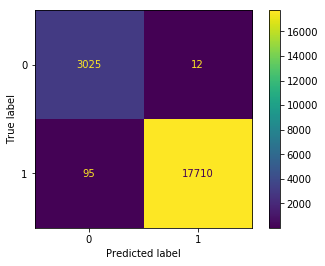

In [247]:
from sklearn import metrics
print('----------------------- Classification Report ------------------------\n')

print(metrics.classification_report(y_test, y_pred))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RFclf, X_test, y_test)  

In [266]:
y_pred_proba = RFclf.predict_proba(X_test)

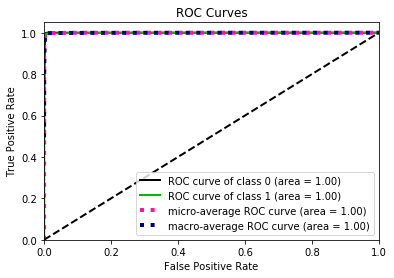

In [269]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [277]:
# logistic model

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [278]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print("Accuracy Score: ", logistic.score(X_test, y_test))

Accuracy Score:  0.9914595528260244


----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3037
           1       1.00      0.99      0.99     17805

    accuracy                           0.99     20842
   macro avg       0.97      0.99      0.98     20842
weighted avg       0.99      0.99      0.99     20842

-------------------------- Confusion matrix --------------------------



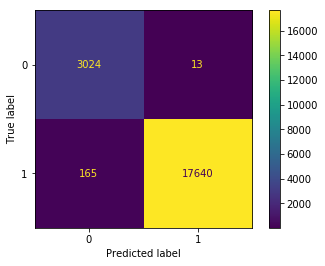

In [280]:
print('----------------------- Classification Report ------------------------\n')
print(metrics.classification_report(y_test, y_pred, labels=[0, 1]))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic, X_test, y_test)  

In [281]:
y_pred_proba = logistic.predict_proba(X_test)

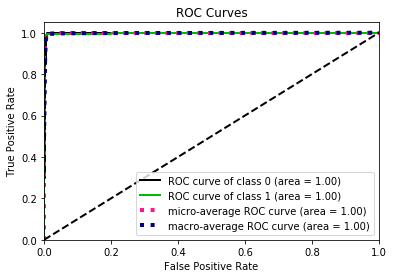

In [282]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()